# Lab-1: Introduction & Data preprocessing.

##### In this lab, you will receive an introduction to python then you will manipulate a dataset and prepare it for training and testing.
### Objectives:
0. Intro to python
1. Data loading
2. One-hot-encoding of categorical features
3. Data imputation
4. Features Scaling
5. Data plotting

## Intro to Python
### Numpy

In [1]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


#### Ways for Arrays creations:

In [2]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

f = np.arange(4)
print(f)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.42176653 0.07986442]
 [0.0637494  0.75858961]]
[0 1 2 3]


#### Array indexing:
##### Slicing

In [3]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


##### Integer Array indexing

In [4]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"
# From this array
x = np.array([1, 2, 3, 4, 5])
# Try to produce this array [1, 1, 3, 3, 5, 5]

[1 4 5]
[1 4 5]
[2 2]
[2 2]


##### Boolean array indexing

In [5]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


##### Basic math

In [6]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))
print(np.log(x))
print(np.square(x))

[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]
[[0.         0.69314718]
 [1.09861229 1.38629436]]
[[ 1.  4.]
 [ 9. 16.]]


###### Matrix operations

In [7]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

print(x.T.dot(v))
print(np.matmul(x, y))
print(np.matmul(x.T, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[39 58]
[[19 22]
 [43 50]]
[[26 30]
 [38 44]]


### Matplotlib

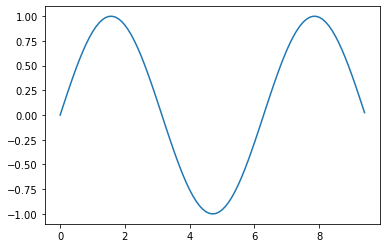

In [8]:
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

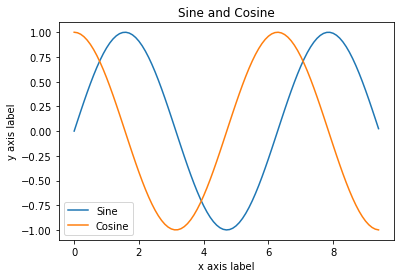

In [9]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

#### Scatter plot

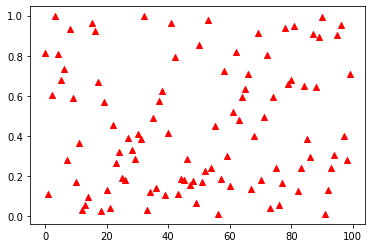

In [10]:
x = np.arange(100)
y = np.random.random((100))

plt.scatter(x, y, c='red', marker='^')
plt.show()

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('cat.jpg')

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
img2 = mpimg.imread('cat2.jpeg')
plt.imshow(img2)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'cat.jpg'

## Data loading

In [16]:
import pandas as pd

data = pd.read_csv('train.csv')
x_test_private = pd.read_csv('test.csv')
x_train = data.loc[:, :'Gender Inequality Index (GII)']
y_train = data['y']

### Data exploration

In [17]:
x_train.head(5)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN


In [18]:
types = x_train.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 1
galactic year                                                                  int64
galaxy                                                                        object
existence expectancy index                                                   float64
existence expectancy at birth                                                float64
Gross income per capita                                                      float64
                                                                              ...   
Intergalactic Development Index (IDI), male, Rank                            float64
Adjusted net savings                                                         float64
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    float64
Private galaxy capital flows (% of GGP)                                      float64
Gender Inequality Index (GII)                                                float64
Length: 79, dtype: object


In [19]:
data.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


## One-hot-encoding of categorical feature
1. Why to encode the categorical feature?
<span style="color:blue">Because most of the machine learning and basic deep learning algorithms can only accept numerical data and features.</span>
2. Why one-hot-encoding form? why not give each category in the feature a specific code value?
<span style="color:blue"> Giving each category a number (e.g. giving categories: red, blue, black -> 1, 2, 3) will indicate to the learning algorithm that there's some ordering (e.g., black is larger than red) which is not true as the categories are nominal.
3. How many new features will be added? What if we have some missing values, which is the case in this dataset?
<span style="color:blue"> Usually the number of new features is #categories - 1, as one indicator variable can be infered from the others (e.g., if not black and blue then it is red for sure, so black -> [1, 0], blue -> [0, 1], red -> [0, 0]). But if the trainset may have empty values for this feature, and there's a posibility that the testset also has empty cells for this feature, then it is better to have #categories new features to indicate missing value (i.e., black -> [1, 0, 0], blue -> [0, 1, 0], red -> [0, 0, 1], NA -> [0, 0, 0]).

4. When is it appropriate to give each category an encoding value?
<span style="color:blue"> It will be appropriate if the categorical feature is ordinal (e.g, small, medium, large). Then it is reasonable approach to give them ordered values without transform it to one-hot-encoding form (i.e., small -> 1, medium -> 2, large -> 3)
##### In the next cell, implement the function that take a dataframe, name of the categorical feature, and the encoder object. Then, adds new features that represent the one-hot-encoding form of this feature and ignore the missing values in it (encode them to zeros).
##### Then encode the same column/feature in the testset with the same encoder object.

In [20]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_feats = ['galaxy']
encoder.fit(x_train[cat_feats])

def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


# Write your code here (2 lines)
# Transform both train and testset.
x_train = ohe_new_features(x_train, cat_feats, encoder)
x_test_private = ohe_new_features(x_test_private, cat_feats, encoder)

### Data Imputation
#### Imputation is filling the missing values in the dataset.
Several issues to address:
1. Why we should fill them? Why not remove the rows that has missing values?
<span style="color:blue"> Most of the machine learning algorithms can't deal with missing values cell (NA/NAN). Removing the rows/cols that have missing values could be an option when the missing values in some rows/cols is a few and the to-be-deleted rows/cols are few comparing to what's left (removing 50 rows out of 10k rows that have 50 empty values on average for 80 features). However, the usual case it not be deleted (why?), Some information will be lost due to the deletion which is the non-missing values, so it is better not to lose them.
2. Filling it with constant value for each value, but what's it?
<span style="color:blue"> Estimating a constant value that best to represent the feature is trivially chosen to be the expected value of this feature, which is the mean. Other options is to use some other central tendency measures like the median, mode or mid-range but the best practice is to use mean or median for numerical continuous features and use mode for the discrete ones.
3. (Advanced) Estimate the filling value, each row for its own.
<span style="color:blue"> There's another option of filling the missing values is to infer them from the rest of the data by regression/classification models (one for each feature).
This method is out of the level of this course so you can read about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) and [here](https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression).
4. How to choose the imputation strategy?
<span style="color:blue"> It can be treated as a hyperparamter and choose the best option using a validation set or cross-validation (to be explained).
4. (Not related only to imputations) Why we fit the imputer to the training data not the concatenation of both train and test set?
<span style="color:blue"> This would cause data leakage to the model. This means the model got some information from the testset which shouldn't be considered at all before the testing step. So, the testset shouldn't affect the preprocessing in anyway (e.g., data imputation or scaling).
Same goes for validation set.

##### In the next cell, implement a function that returns the count of nan/empty cells in a dataframe.
##### Use SimpleImputer object, fit it to the trainset, then transform both the train and test sets.

In [21]:
from sklearn.impute import SimpleImputer
import numpy as np

# Complete a function that returns number of empty cells in
def count_nans(df):
    # 1 or 2 lines.
    return pd.isna(df).sum().sum()
# Print number of empty cells both in x_train and x_test_private (1 line)
print("#Empty cells in x_train=", count_nans(x_train))
print("#Empty cells in x_test_private=", count_nans(x_test_private))

# Write your code here (4 lines):
# create the imputer object.
# fit it to the trainset.
# transform the train and test set.
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)
x_train = imputer.transform(x_train)
x_test_private = imputer.transform(x_test_private)

print("After Imputing:")
# Print number of empty cells both in x_train and x_test_private (1 line)
print("#Empty cells in x_train=", count_nans(x_train))
print("#Empty cells in x_test_private=", count_nans(x_test_private))



#Empty cells in x_train= 185698
#Empty cells in x_test_private= 19834
After Imputing:
#Empty cells in x_train= 0
#Empty cells in x_test_private= 0


### Features Scaling
1. Why we need to make all the features have same range of values?
<span style="color:blue"> This has something to do with some machine learning algorithms.
First, gradient-related algorithms (e.g., linear regression, logisitic regression, deep learning algorithms): feature scaling is important for the congergence of the algorithms as the gradient in one direction/feature could need more/long steps than the others and the scaling solves this issue and make the training stable and relatively faster.
Second, distance related algorithms (e.g., KNN, K-means). These algorithms depends on the distance between samples both in training and testing. Having features with different ranges would affect the distance measure and produce biased prediciton to the features with larger range.
for example: having two features (length in KM [10: 10000] and temperature in C° [20: 40]). The distance value will be much affected by the length feature.
2. What are the different strategies to scale the features?
<span style="color:blue">Min-Max scaling: transform all features to fall in this range: [0, 1].
$$x_i = \frac{x_i - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})}\\$$
Standard scaling: transform all features to have mean = 0 and standard deviation = 1. And by assuming that all features follow normal distribution, we can say that standard scaling turns featrues to be $\sim N(0,1)$.
$$x_i = \frac{x_i - mean(\mathbf{x})}{stdev(\mathbf{x})}\\$$
Robust scaling: robust to the outliers that may affect the previous methods in calculating their mean, stdev, min, or max. It uses the interquartile range to scale the features according to it.
Interquartile is the range between the 1st quartile and 3rd quartile.
$$x_i = \frac{x_i - Q_1(\mathbf{x})}{Q_3(\mathbf{x}) - Q_1(\mathbf{x})}\\$$
3. How to choose the strategy?
<span style="color:blue">Same as in imputation strategy, using a validation set or using cross-validation.

##### In the following cell, scale all the features with a scaler from your choice. Fit the scaler on the training set and transform both train and test set.

In [22]:
# Write your code here (5 lines):
# choose the scaler class.
# create the scaler object.
# fit it to the trainset.
# transform the train and test set.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test_private = scaler.transform(x_test_private)

### Data Plotting
Visualization is key-issue to get some insights and intuition about your dataset.
How to plot 259 features (259-dimensional data)? what we can plot -at maximum- is 2d or 3d data.

Hint: We should reduce the dimension. Read this [article](https://towardsdatascience.com/dimensionality-reduction-ways-and-intuitions-1b5e97592d8e).

So, Let's use UMAP to reduce the dimension of this dataset to be 2D.

In [23]:
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.manifold import MDS, TSNE

dim_reducer = TSNE(n_components=2)
x_train_reduced = dim_reducer.fit_transform(x_train)

Let's plot the reduced dataset on a 2D plane.
Use matplotlib to make a scatter plot for the reduced dataset.

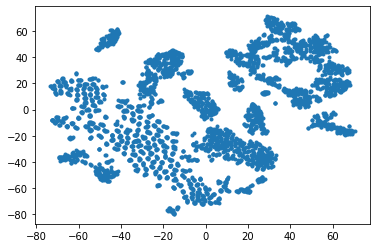

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Write code to plot the reduced dataset in a scatter plot.
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], marker='.')
plt.show()
